In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# **Preprocessing data**

## **Import data**

In [ ]:
path = r"/content/Standout2019.csv"
data = pd.read_csv(path)
data

,Thickness,Length,Profile,Stress
0,0.115,3000,A,814.43463
1,0.120,3250,A,1171.89320
2,0.125,3250,A,1026.75990
3,0.130,3000,A,677.87006
4,0.135,3250,A,822.44940
...,...,...,...,...
198,0.235,7250,G,1260.59880
199,0.240,7000,G,1196.55750
200,0.245,7500,G,1300.36840
201,0.250,7250,G,1221.70650


## **Separate data by class**

In [ ]:
datasets = {}
df = pd.DataFrame(data)
by_class = df.groupby('Profile')

for groups, d in by_class:
  datasets[groups] = d

cA = datasets["A"].to_numpy()
cB = datasets["B"].to_numpy()
cC = datasets["C"].to_numpy()
cD = datasets["D"].to_numpy()
cE = datasets["E"].to_numpy()
cF = datasets["F"].to_numpy()
cG = datasets["G"].to_numpy()

## **Plot data**

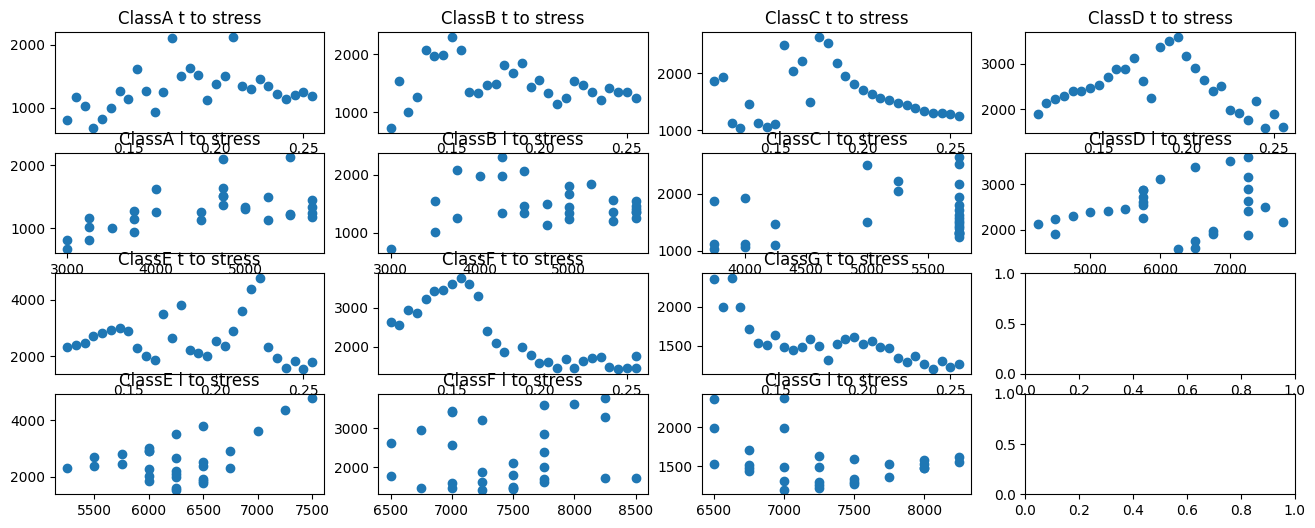

In [ ]:
figure, axis = plt.subplots(4, 4) #(1,4)
figure.set_figheight(6)
figure.set_figwidth(16)

# Class A Thickness - Stress
axis[0,0].scatter(cA[:,0],cA[:,3])
axis[0,0].set_title("ClassA t to stress")

# Class A Length - Stress
axis[1,0].scatter(cA[:,1],cA[:,3])
axis[1,0].set_title("ClassA l to stress")

# Class B Thickness - Stress
axis[0,1].scatter(cB[:,0],cB[:,3])
axis[0,1].set_title("ClassB t to stress")

# Class B Length - Stress
axis[1,1].scatter(cB[:,1],cB[:,3])
axis[1,1].set_title("ClassB l to stress")

# Class C
axis[0,2].scatter(cC[:,0],cC[:,3])
axis[0,2].set_title("ClassC t to stress")

axis[1,2].scatter(cC[:,1],cC[:,3])
axis[1,2].set_title("ClassC l to stress")

# Class D
axis[0,3].scatter(cD[:,0],cD[:,3])
axis[0,3].set_title("ClassD t to stress")

axis[1,3].scatter(cD[:,1],cD[:,3])
axis[1,3].set_title("ClassD l to stress")

# Class E
axis[2,0].scatter(cE[:,0],cE[:,3])
axis[2,0].set_title("ClassE t to stress")

axis[3,0].scatter(cE[:,1],cE[:,3])
axis[3,0].set_title("ClassE l to stress")

# Class F
axis[2,1].scatter(cF[:,0],cF[:,3])
axis[2,1].set_title("ClassF t to stress")

axis[3,1].scatter(cF[:,1],cF[:,3])
axis[3,1].set_title("ClassF l to stress")

# Class G
axis[2,2].scatter(cG[:,0],cG[:,3])
axis[2,2].set_title("ClassG t to stress")

axis[3,2].scatter(cG[:,1],cG[:,3])
axis[3,2].set_title("ClassG l to stress")

plt.show()

## **Onehot Encoding data**

In [ ]:
onehot_encoder = OneHotEncoder()
onehot_encoder.fit(data[["Profile"]])
profile_encoded = onehot_encoder.transform(data[["Profile"]])
onehot_profile = profile_encoded.toarray()
print(onehot_profile)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


## **Name the encoded column**

In [ ]:
data[["profileA","profileB","profileC","profileD","profileE","profileF","profileG"]] = onehot_profile
data

,Thickness,Length,Profile,Stress,profileA,profileB,profileC,profileD,profileE,profileF,profileG
0,0.115,3000,A,814.43463,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.120,3250,A,1171.89320,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.125,3250,A,1026.75990,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.130,3000,A,677.87006,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.135,3250,A,822.44940,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
198,0.235,7250,G,1260.59880,0.0,0.0,0.0,0.0,0.0,0.0,1.0
199,0.240,7000,G,1196.55750,0.0,0.0,0.0,0.0,0.0,0.0,1.0
200,0.245,7500,G,1300.36840,0.0,0.0,0.0,0.0,0.0,0.0,1.0
201,0.250,7250,G,1221.70650,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## **Drop unwanted column**

In [ ]:
data = data.drop(["Profile", "profileG"], axis=1)
s_data = data.sample(frac=1)
s_data

,Thickness,Length,Stress,profileA,profileB,profileC,profileD,profileE,profileF
58,0.115,3750,1868.4135,0.0,0.0,1.0,0.0,0.0,0.0
172,0.255,7500,1451.8389,0.0,0.0,0.0,0.0,0.0,1.0
63,0.140,4000,1117.1300,0.0,0.0,1.0,0.0,0.0,0.0
88,0.120,4250,2128.8896,0.0,0.0,0.0,1.0,0.0,0.0
183,0.160,6750,1439.9777,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
62,0.135,4250,1459.0389,0.0,0.0,1.0,0.0,0.0,0.0
96,0.160,5750,2884.8887,0.0,0.0,0.0,1.0,0.0,0.0
72,0.185,5750,2171.0854,0.0,0.0,1.0,0.0,0.0,0.0
157,0.175,7500,2108.9106,0.0,0.0,0.0,0.0,0.0,1.0


## **Separate X and y -- all to Stress**

In [ ]:
x = s_data[["Thickness","Length","profileA","profileB","profileC","profileD","profileE","profileF"]]
y = s_data["Stress"]
print(x,y)

     Thickness  Length  profileA  profileB  profileC  profileD  profileE  \
37       0.155    4500       0.0       1.0       0.0       0.0       0.0   
137      0.220    7250       0.0       0.0       0.0       0.0       1.0   
135      0.210    6750       0.0       0.0       0.0       0.0       1.0   
145      0.115    6500       0.0       0.0       0.0       0.0       0.0   
75       0.200    5750       0.0       0.0       1.0       0.0       0.0   
..         ...     ...       ...       ...       ...       ...       ...   
5        0.140    3500       1.0       0.0       0.0       0.0       0.0   
132      0.195    6250       0.0       0.0       0.0       0.0       1.0   
188      0.185    7750       0.0       0.0       0.0       0.0       0.0   
124      0.155    6000       0.0       0.0       0.0       0.0       1.0   
49       0.215    5000       0.0       1.0       0.0       0.0       0.0   

     profileF  
37        0.0  
137       0.0  
135       0.0  
145       1.0  
75     

## **Separate train and test data**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=87)
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
print(x_train)

[[ 2.35e-01  5.50e+03  0.00e+00 ...  0.00e+00  0.00e+00  0.00e+00]
 [ 1.95e-01  8.25e+03  0.00e+00 ...  0.00e+00  0.00e+00  0.00e+00]
 [ 2.10e-01  4.75e+03  0.00e+00 ...  0.00e+00  0.00e+00  0.00e+00]
 ...
 [ 2.55e-01  5.75e+03  1.00e+00 ...  0.00e+00  0.00e+00  0.00e+00]
 [ 1.80e-01  5.75e+03  0.00e+00 ...  1.00e+00  0.00e+00  0.00e+00]
 [ 1.45e-01  5.50e+03  0.00e+00 ...  1.00e+00  0.00e+00  0.00e+00]]


## **Scale data for faster calculation**

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
print(x_train)

[[ 1.15e+00 -3.79e-01 -3.99e-01 ... -4.08e-01 -3.71e-01 -4.08e-01]
 [ 1.82e-01  1.75e+00 -3.99e-01 ... -4.08e-01 -3.71e-01 -4.08e-01]
 [ 5.45e-01 -9.59e-01 -3.99e-01 ... -4.08e-01 -3.71e-01 -4.08e-01]
 ...
 [ 1.63e+00 -1.86e-01  2.51e+00 ... -4.08e-01 -3.71e-01 -4.08e-01]
 [-1.80e-01 -1.86e-01 -3.99e-01 ...  2.45e+00 -3.71e-01 -4.08e-01]
 [-1.03e+00 -3.79e-01 -3.99e-01 ...  2.45e+00 -3.71e-01 -4.08e-01]]


# **Regression**

## **cost function**

### **Testing**

In [ ]:
w = np.array([1,2,3,4,4,3,2,1])
b = 1
y_pred = (x_train*w).sum(axis=1) + b
((y_train - y_pred)**2).mean()

4132779.815314564

### **define function**

In [ ]:
def compute_cost(x, y, w, b):
  y_pred = (x*w).sum(axis=1) + b
  cost = ((y - y_pred)**2).mean()
  return cost

### **function testing**

In [ ]:
w = np.array([1,1,1,1,1,1,1,1])
b = 0
compute_cost(x_train, y_train, w, b)

4064380.750798159

## **Gradient calculation*

### **Testing**

In [ ]:
y_pred = (x_train*w).sum(axis=1) + b
b_gradient = (y_pred - y_train).mean()
w_gradient = np.zeros(x_train.shape[1])

for i in range(x_train.shape[1]):
  w_gradient[i] = (x_train[:, i]*(y_pred - y_train)).mean()

w_gradient, b_gradient

(array([ 149.04344236, -273.86181394,  249.27671957,  152.32520209,
         141.4319902 , -219.89731287, -314.89666231, -127.94394154]),
 -1896.5427254938274)

### **Gradient calculate function**

In [ ]:
def compute_gradient(x, y, w, b):
  y_pred = (x*w).sum(axis=1) + b
  w_gradient = np.zeros(x.shape[1])
  b_gradient = (y_pred - y).mean()
  for i in range(x.shape[1]):
    w_gradient[i] = (x[:, i]*(y_pred - y)).mean()

  return w_gradient, b_gradient

### **Function testing**

In [ ]:
w = np.array([1,1,1,1,1,1,1,1])
b = 1
compute_gradient(x_train, y_train, w, b)

(array([ 1.86e+02, -2.45e+02,  2.29e+02,  1.53e+02,  1.11e+02, -2.50e+02,
        -2.72e+02, -1.53e+02]),
 -1886.4596435714286)

## **Gradient desent**

### **Testing**

In [ ]:
w = np.array([1,1,1,1,1,1,1,1])
b = 1
learning_rate = 0.001
w_gradient, b_gradient = compute_gradient(x_train, y_train, w, b)
print(compute_cost(x_train, y_train, w, b))
w = w - w_gradient*learning_rate
b = b - b_gradient*learning_rate
w, b
print(compute_cost(x_train, y_train, w, b))

4060606.8315110155
4052807.3880295847


### **Define gradient descent function**

In [ ]:
np.set_printoptions(formatter={'float': '{: .2e}'.format})
def gradient_descent(x, y, w_init, b_init, learning_rate, cost_function, gradient_function, run_iter, p_iter=1000):

  c_hist = []
  w_hist = []
  b_hist = []

  w = w_init
  b = b_init

  for i in range(run_iter):
    w_gradient, b_gradient = gradient_function(x, y, w, b)

    w = w - w_gradient*learning_rate
    b = b - b_gradient*learning_rate
    cost = cost_function(x, y, w, b)

    w_hist.append(w)
    b_hist.append(b)
    c_hist.append(cost)

    if i%p_iter == 0:
      print(f"Iteration {i:5} : Cost {cost: .4e}, w: {w}, b: {b: .2e}, w_gradient: {w_gradient}, b_gradient: {b_gradient: .2e}")

  return w, b, w_hist, b_hist, c_hist

### **Function testing**

In [ ]:
w_init = np.array([1,1,1,1,1,1,1,1])
b_init = 0
learning_rate = 1.0e-2
run_iter = 100000

w_final, b_final, w_hist, b_hist, c_hist = gradient_descent(x_train, y_train, w_init, b_init, learning_rate, compute_cost, compute_gradient, run_iter)

Iteration     0 : Cost  3.9867e+06, w: [-8.56e-01  3.45e+00 -1.29e+00 -5.31e-01 -1.07e-01  3.50e+00  3.72e+00
  2.53e+00], b:  1.89e+01, w_gradient: [ 1.86e+02 -2.45e+02  2.29e+02  1.53e+02  1.11e+02 -2.50e+02 -2.72e+02
 -1.53e+02], b_gradient: -1.89e+03
Iteration  1000 : Cost  1.7291e+05, w: [-3.14e+02  3.41e+02  9.28e+01  1.52e+02  1.48e+02  3.69e+02  3.70e+02
  1.81e+02], b:  1.89e+03, w_gradient: [ 9.90e+00 -2.33e+01 -2.18e+01 -2.11e+01 -1.84e+01 -1.13e+01 -1.03e+01
 -3.82e+00], b_gradient: -8.15e-02
Iteration  2000 : Cost  1.4493e+05, w: [-3.96e+02  5.33e+02  2.67e+02  3.20e+02  2.94e+02  4.55e+02  4.49e+02
  2.05e+02], b:  1.89e+03, w_gradient: [ 6.61e+00 -1.53e+01 -1.37e+01 -1.32e+01 -1.14e+01 -6.66e+00 -6.05e+00
 -1.68e+00], b_gradient: -3.52e-06
Iteration  3000 : Cost  1.3382e+05, w: [-4.49e+02  6.56e+02  3.76e+02  4.25e+02  3.84e+02  5.09e+02  4.97e+02
  2.18e+02], b:  1.89e+03, w_gradient: [ 4.18e+00 -9.69e+00 -8.61e+00 -8.31e+00 -7.16e+00 -4.18e+00 -3.80e+00
 -1.03e+00], b_

# **Verify result**

## **Show final w and b**

In [ ]:
print(w_final, b_final)

[-5.40e+02  8.66e+02  5.63e+02  6.05e+02  5.40e+02  5.99e+02  5.79e+02
  2.40e+02] 1887.4596435714177


In [ ]:
x_test[:,0],y_test.to_numpy()

(array([ 1.82e-01,  1.15e+00, -3.01e-01,  1.27e+00,  1.39e+00, -1.15e+00,
        -1.63e+00, -5.91e-02,  9.07e-01, -4.21e-01, -1.27e+00, -1.75e+00,
        -1.75e+00, -1.51e+00, -9.04e-01, -1.63e+00, -1.75e+00,  6.65e-01,
        -9.04e-01,  6.17e-02, -9.04e-01]),
 array([ 1.13e+03,  1.92e+03,  2.11e+03,  1.50e+03,  1.84e+03,  1.00e+03,
         1.93e+03,  2.20e+03,  4.78e+03,  1.26e+03,  2.40e+03,  7.27e+02,
         1.90e+03,  2.45e+03,  3.62e+03,  2.39e+03,  2.36e+03,  1.52e+03,
         1.14e+03,  2.09e+03,  2.54e+03]))

## **test the w and b with test data**

In [ ]:
y_pred = (w_final*x_test).sum(axis=1) + b_final
result = pd.DataFrame({
    "y_pred": y_pred,
    "y_test": y_test
})
result

,y_pred,y_test
16,1159.289085,1128.9355
140,2119.961391,1918.5747
157,2482.874900,2108.9106
169,1635.497763,1495.3893
142,1989.595678,1837.9510
5,1206.346650,1003.9647
59,1686.103561,1930.3046
130,2604.301494,2204.1650
138,2920.280963,4779.8779
11,1485.203368,1256.0552


## **Compute the cost with test data**

In [ ]:
compute_cost(x_test, y_test, w_final, b_final)

273646.58448779065

# **Test_2 Thickness and profile to Length**

# **Data preprocessing**

## **make X to y**

In [ ]:
X2 = s_data[["Thickness","profileA","profileB","profileC","profileD","profileE","profileF"]]
y2 = s_data["Length"]
print(X2,y2)

     Thickness  profileA  profileB  profileC  profileD  profileE  profileF
37       0.155       0.0       1.0       0.0       0.0       0.0       0.0
137      0.220       0.0       0.0       0.0       0.0       1.0       0.0
135      0.210       0.0       0.0       0.0       0.0       1.0       0.0
145      0.115       0.0       0.0       0.0       0.0       0.0       1.0
75       0.200       0.0       0.0       1.0       0.0       0.0       0.0
..         ...       ...       ...       ...       ...       ...       ...
5        0.140       1.0       0.0       0.0       0.0       0.0       0.0
132      0.195       0.0       0.0       0.0       0.0       1.0       0.0
188      0.185       0.0       0.0       0.0       0.0       0.0       0.0
124      0.155       0.0       0.0       0.0       0.0       1.0       0.0
49       0.215       0.0       1.0       0.0       0.0       0.0       0.0

[203 rows x 7 columns] 37     4500
137    7250
135    6750
145    6500
75     5750
       ... 
5   

## **Separate train, test**

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.1, random_state=87)
X2_train = X2_train.to_numpy()
X2_test = X2_test.to_numpy()
print(X2_train)
print(X2_train.shape)

[[ 2.35e-01  0.00e+00  1.00e+00 ...  0.00e+00  0.00e+00  0.00e+00]
 [ 1.95e-01  0.00e+00  0.00e+00 ...  0.00e+00  0.00e+00  0.00e+00]
 [ 2.10e-01  0.00e+00  1.00e+00 ...  0.00e+00  0.00e+00  0.00e+00]
 ...
 [ 2.55e-01  1.00e+00  0.00e+00 ...  0.00e+00  0.00e+00  0.00e+00]
 [ 1.80e-01  0.00e+00  0.00e+00 ...  1.00e+00  0.00e+00  0.00e+00]
 [ 1.45e-01  0.00e+00  0.00e+00 ...  1.00e+00  0.00e+00  0.00e+00]]
(182, 7)


## **Scale data**

In [ ]:
scaler = StandardScaler()
scaler.fit(X2_train)
X2_train = scaler.transform(X2_train)
X2_test = scaler.transform(X2_test)
print(X2_train)

[[ 1.15e+00 -3.99e-01  2.35e+00 ... -4.08e-01 -3.71e-01 -4.08e-01]
 [ 1.82e-01 -3.99e-01 -4.26e-01 ... -4.08e-01 -3.71e-01 -4.08e-01]
 [ 5.45e-01 -3.99e-01  2.35e+00 ... -4.08e-01 -3.71e-01 -4.08e-01]
 ...
 [ 1.63e+00  2.51e+00 -4.26e-01 ... -4.08e-01 -3.71e-01 -4.08e-01]
 [-1.80e-01 -3.99e-01 -4.26e-01 ...  2.45e+00 -3.71e-01 -4.08e-01]
 [-1.03e+00 -3.99e-01 -4.26e-01 ...  2.45e+00 -3.71e-01 -4.08e-01]]


# **Regression**

## **cost function**

### **Define function**

In [ ]:
def compute_cost(x, y, w, b):
  y_pred = (x*w).sum(axis=1) + b
  cost = ((y - y_pred)**2).mean()
  return cost

### **Function testing**

In [ ]:
w = np.array([1,1,1,1,1,1,1])
b = 0
compute_cost(X2_train, y2_train, w, b)

37556744.59581418

## **Calculate gradient**

### **Define fuction**

In [ ]:
def compute_gradient(x, y, w, b):
  y_pred = (x*w).sum(axis=1) + b
  w_gradient = np.zeros(x.shape[1])
  b_gradient = (y_pred - y).mean()
  for i in range(x.shape[1]):
    w_gradient[i] = (x[:, i]*(y_pred - y)).mean()

  return w_gradient, b_gradient

### **Function testing**

In [ ]:
w = np.array([1,1,1,1,1,1,1])
b = 1
compute_gradient(X2_train, y2_train, w, b)

(array([-5.30e+02,  5.55e+02,  4.91e+02,  3.32e+02, -1.29e+02, -9.61e+01,
        -5.81e+02]),
 -5989.384615384615)

## **Gradient descent**

### **Define function**

In [ ]:
np.set_printoptions(formatter={'float': '{: .2e}'.format})
def gradient_descent(x, y, w_init, b_init, learning_rate, cost_function, gradient_function, run_iter, p_iter=1000):

  c_hist = []
  w_hist = []
  b_hist = []

  w = w_init
  b = b_init

  for i in range(run_iter):
    w_gradient, b_gradient = gradient_function(x, y, w, b)

    w = w - w_gradient*learning_rate
    b = b - b_gradient*learning_rate
    cost = cost_function(x, y, w, b)

    w_hist.append(w)
    b_hist.append(b)
    c_hist.append(cost)

    if (i-999)%p_iter == 0:
      print(f"Iteration {(i+1):5} : Cost {cost: .4e}, w: {w}, b: {b: .2e}, w_gradient: {w_gradient}, b_gradient: {b_gradient: .2e}")

  return w, b, w_hist, b_hist, c_hist

In [ ]:
w_init = np.random.randn(7)
w_init

array([ 1.01e+00,  2.26e-01,  1.62e+00,  1.20e+00,  1.70e+00, -1.64e+00,
        3.19e-01])

### **Function testing**

In [ ]:
#w_init = np.array([1,1,1,1,1,1,1])
b_init = 0
learning_rate = 1.0e-2
run_iter = 10000

w2_final, b2_final, w_hist, b_hist, c_hist = gradient_descent(X2_train, y2_train, w_init, b_init, learning_rate, compute_cost, compute_gradient, run_iter)

Iteration  1000 : Cost  2.4619e+05, w: [ 5.33e+02 -8.53e+02 -8.04e+02 -6.60e+02 -2.82e+02 -2.50e+02  1.22e+02], b:  5.99e+03, w_gradient: [-1.13e-02  1.63e+01  1.70e+01  1.67e+01  1.65e+01  1.54e+01  1.65e+01], b_gradient: -2.61e-01
Iteration  2000 : Cost  2.3745e+05, w: [ 5.33e+02 -9.29e+02 -8.83e+02 -7.38e+02 -3.58e+02 -3.22e+02  4.52e+01], b:  5.99e+03, w_gradient: [ 2.38e-03  2.70e+00  2.82e+00  2.78e+00  2.74e+00  2.57e+00  2.74e+00], b_gradient: -1.13e-05
Iteration  3000 : Cost  2.3721e+05, w: [ 5.33e+02 -9.41e+02 -8.96e+02 -7.51e+02 -3.71e+02 -3.34e+02  3.25e+01], b:  5.99e+03, w_gradient: [ 3.95e-04  4.49e-01  4.69e-01  4.63e-01  4.56e-01  4.27e-01  4.56e-01], b_gradient: -4.87e-10
Iteration  4000 : Cost  2.3720e+05, w: [ 5.33e+02 -9.43e+02 -8.98e+02 -7.53e+02 -3.73e+02 -3.36e+02  3.04e+01], b:  5.99e+03, w_gradient: [ 6.58e-05  7.47e-02  7.80e-02  7.70e-02  7.59e-02  7.10e-02  7.59e-02], b_gradient: -4.43e-11
Iteration  5000 : Cost  2.3720e+05, w: [ 5.33e+02 -9.44e+02 -8.99e+0

# **Verify result**

## **Show final w and b**

In [ ]:
print(w2_final, b2_final)

[ 5.33e+02 -9.44e+02 -8.99e+02 -7.54e+02 -3.73e+02 -3.36e+02  2.99e+01] 5990.384615384571


## **Test w and b with test data**

In [ ]:
y2_pred = (w2_final*X2_test).sum(axis=1) + b2_final
result2 = pd.DataFrame({
    "y2_pred": y2_pred,
    "y2_test": y2_test
})
result2

,y2_pred,y2_test
16,4684.934784,4500
140,6910.993815,6500
157,7255.075006,7500
169,8091.553900,7500
142,7039.682876,6500
5,3977.144951,3500
59,4341.283639,4000
130,6267.548512,6250
138,6782.304755,7500
11,4363.212132,4500


## **Compute cost with test data**

In [ ]:
compute_cost(X2_test, y2_test, w2_final, b2_final)

239285.80382837617

# **Inference**

In [ ]:
x_real = np.array([[5.3, 2, 1, 0], [7.2, 0, 0, 1]])
x_real = scaler.transform(x_real)
y_real = (w_final*x_real).sum(axis=1) + b_final
y_real